<a href="https://colab.research.google.com/github/meghna2312/BloodDonation/blob/master/Blood_donors_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Prediction of Blood Donors




<h5>Aim:</h5> To build a binary classifier to predict if a blood donor is likely to donate again.

Dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.

URL :<href=https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center> DataSet Folder and Dataset Description</href>

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

<h3> Load Dataset

In [ ]:
import pandas as pd
df=pd.read_csv(r"C:\Users\USER\Desktop\New folder\transfusion.data")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


<h3>Exploraty Data Analysis(EDA)

<h4>Null Value Handling

In [ ]:
import numpy as np

<h4> Check variance in each variable

In [ ]:
df.var().round(3)

Recency (months)                                   65.535
Frequency (times)                                  34.098
Monetary (c.c. blood)                         2131094.230
Time (months)                                     594.224
whether he/she donated blood in March 2007          0.182
dtype: float64

<h4>Log Normalization of variables

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.
This means that, unless accounted for, this feature may get more weight by the model (i.e., be seen as more important) than any other feature.

We can see that Monetary and Time variance is very high compared to other variables, so we normalize:

<h5>a) Monetary (c.c. blood)

In [ ]:
for i in df['Monetary (c.c. blood)']:
    df['Monetary']=np.log(df['Monetary (c.c. blood)'])
df.drop(columns='Monetary (c.c. blood)', inplace=True)

<h5>b)Time (months) 

In [ ]:
for i in df['Time (months)']:
    df['Time in months']=np.log(df['Time (months)'])
df.drop(columns='Time (months)', inplace=True)

In [ ]:
df.var().round(3)

Recency (months)                              65.535
Frequency (times)                             34.098
whether he/she donated blood in March 2007     0.182
Monetary                                       0.836
Time in months                                 0.954
dtype: float64

<h4>Inspecting the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
Monetary                                      748 non-null float64
Time in months                                748 non-null float64
dtypes: float64(2), int64(3)
memory usage: 29.3 KB


<h4> Pair plot of features

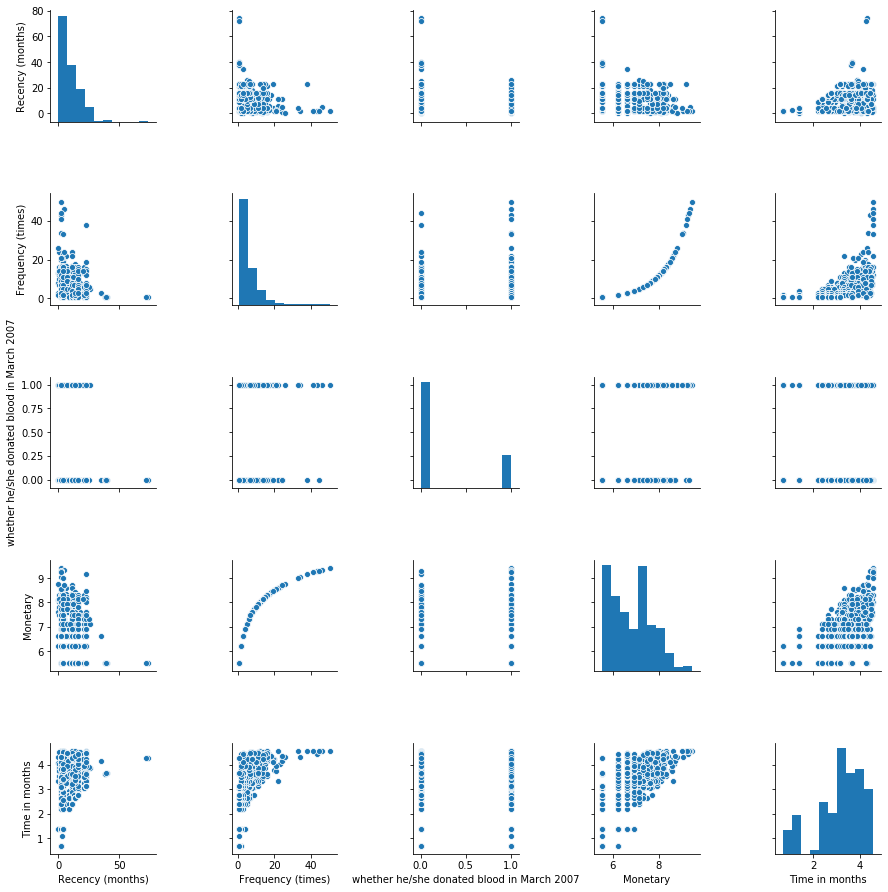

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df)

<h4> Renaming the target variable

In [ ]:
df.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)

<h4>Checking count's of 1's and 0's(i.e. person will donate blood or not) in target variable

In [ ]:
df.target.value_counts()

0    570
1    178
Name: target, dtype: int64

<h4>Checking relative frequency of the unique values(i.e 1's and 0's in target variable) i.e Target Incidence.
    This gives us an idea of how balanced (or imbalanced) is our dataset.
   

In [ ]:
df['target'].value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

<h3> Split the Dataset into train and test sets </h3> <h5>(stratifying on the target column)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(columns='target'),
    df.target,
    test_size=0.25,
    random_state=42,
    stratify=df['target']
)

<h3>Selecting model using TPOT

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

We are using TPOT so we know which ML model will be best suited for our dataset, we will use ROC_AUC_SCORE as the scoring factor between all the model to chose the best one

In [ ]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score
# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.7455575432319619
Generation 2 - Current best internal CV score: 0.7455575432319619
Generation 3 - Current best internal CV score: 0.7455575432319619
Generation 4 - Current best internal CV score: 0.7455575432319619
Generation 5 - Current best internal CV score: 0.7469636489061934

Best pipeline: LogisticRegression(MinMaxScaler(input_matrix), C=25.0, dual=False, penalty=l2)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
               disable_update_check=True, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring='roc_auc', subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


AUC score: 0.7670

Best pipeline steps:
1. MinMaxScaler(copy=True, feature_range=(0, 1))
2. LogisticRegression(C=25.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


<b>Conclusion:</b> We proceed with Logistic Regression as our classifier

<h3> AUC score using Logistic Regression</h3>
    
 AUC score checks performance i.e how well the model works.

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='liblinear',random_state=42)
logreg.fit(X_train, y_train)
abc=logreg.predict_proba(X_test)
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7735


<h3>Analysis report

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [ ]:
#Model Evaluation on training set
pred=logreg.predict(X_train)
print ('Confusion Matrix :')
print(confusion_matrix(y_train,pred)) 
print ('Accuracy Score :',accuracy_score(y_train,pred)) 
print ('Report : ')
print (classification_report(y_train,pred) )

Confusion Matrix :
[[422   5]
 [120  14]]
Accuracy Score : 0.7771836007130125
Report : 
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       427
           1       0.74      0.10      0.18       134

    accuracy                           0.78       561
   macro avg       0.76      0.55      0.53       561
weighted avg       0.77      0.78      0.71       561



In [ ]:
#Cross validation with test set
y_pred=logreg.predict(X_test)
print ('Confusion Matrix :')
print(confusion_matrix(y_test,y_pred)) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred)) 
print ('Report : ')
print (classification_report(y_test,y_pred) )

Confusion Matrix :
[[142   1]
 [ 40   4]]
Accuracy Score : 0.7807486631016043
Report : 
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       143
           1       0.80      0.09      0.16        44

    accuracy                           0.78       187
   macro avg       0.79      0.54      0.52       187
weighted avg       0.78      0.78      0.71       187



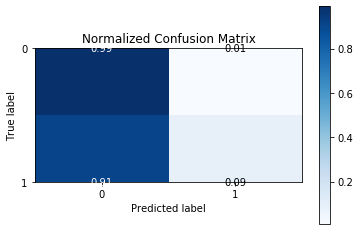

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

ROC Curve representing accuracy of the test :


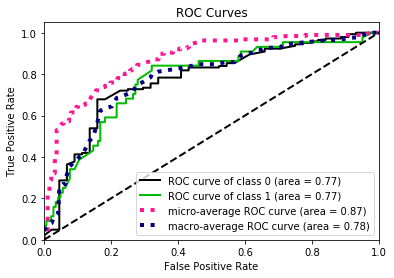

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
print("ROC Curve representing accuracy of the test :")
skplt.metrics.plot_roc(y_test, abc)
plt.show()

Cumulative Gains curve :


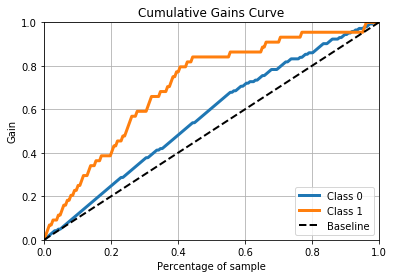

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, abc)
print("Cumulative Gains curve :")
plt.show()

From the above graph we see that if we pick suppose 40% of observations on the x-axis, 80% of the targets with the highest probability are located in this group.


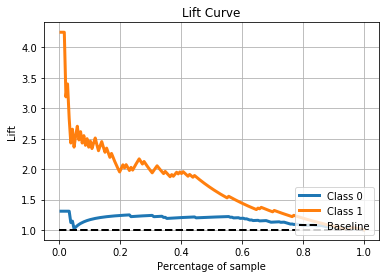

In [ ]:
#Plotting Lift curve
skplt.metrics.plot_lift_curve(y_test, abc)

<h6>Conclusion:</h6>

Our model records an AUC score of 0.77, meaning it is 77% accurate in ordering objects from having a low chance 
    to be a target to a high chance  of being a target.
    
Moreover, the model has an accuracy of approximately 78% on the training set. After cross validating with test set,vthe model has approximately 77% accuracy. The accuracy is on average about 1% more than on training set due to some bias. By tuning hyperparameters of model, bias can be reduced, and even accuracy can be potentially improved.